# CatBoost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from catboost import CatBoostClassifier

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

import joblib

%load_ext nb_black
%config InlineBackend.figure_format = 'svg'

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/main_df_ML.csv"
)

# df = df.drop(columns=["OWN_CAR_AGE"])

X = df.drop("TARGET", axis=1)
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

<IPython.core.display.Javascript object>

In [3]:
numerical_transformer = Pipeline(steps=[("scaler", StandardScaler())])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

<IPython.core.display.Javascript object>

In [4]:
CB_model = CatBoostClassifier(auto_class_weights="Balanced", verbose=0)  # 'verbose=0'

CB_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", CB_model)])

CB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLA...
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'Income_Class'],
      dtype='object'))])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x15bd55090>)])

<IPython.core.display.Javascript object>

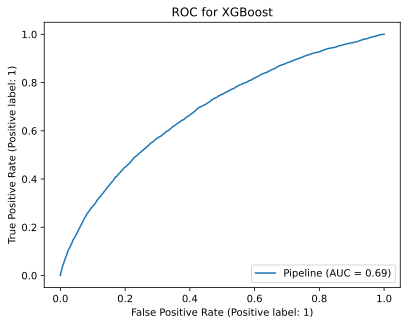

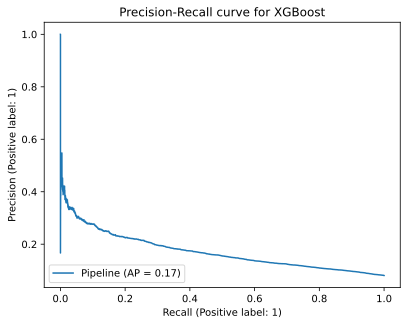

<IPython.core.display.Javascript object>

In [5]:
RocCurveDisplay.from_estimator(CB_pipeline, X_test, y_test)
plt.title("ROC for XGBoost")
plt.show()

PrecisionRecallDisplay.from_estimator(CB_pipeline, X_test, y_test)
plt.title("Precision-Recall curve for XGBoost")
plt.show()

## Coclusion

Metrics of interest for this model is areas under the ROC and PR curves (respectively): 0.69 and 0.17.

# CatBoost model optimised

In [6]:
df = pd.read_csv(
    "/Users/drkazimieras/Turing College/Home credit default risk/main_df_ML.csv"
)

<IPython.core.display.Javascript object>

In [7]:
df = df.rename(columns={"DTI (%)": "DTI_PROC"})

<IPython.core.display.Javascript object>

One of the columns was renamed as part of model deployment preparation.

In [8]:
pd.set_option("display.max_columns", None)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Income_Class,DTI_PROC
0,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,Upper middle income,12.197778
1,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,Upper middle income,13.221667
2,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,Middle income,10.000000
3,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,Upper middle income,21.990000
4,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,Upper middle income,17.996296


<IPython.core.display.Javascript object>

In [9]:
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

<IPython.core.display.Javascript object>

In [10]:
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

<IPython.core.display.Javascript object>

In [11]:
categorical_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'Income_Class'],
      dtype='object')

<IPython.core.display.Javascript object>

In [12]:
numerical_cols

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'DTI_PROC'],
      dtype='object')

<IPython.core.display.Javascript object>

In [13]:
model_best_search = CatBoostClassifier(
    verbose=0,
    cat_features=[
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "OCCUPATION_TYPE",
        "WEEKDAY_APPR_PROCESS_START",
        "ORGANIZATION_TYPE",
        "Income_Class",
    ],
)

param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "iterations": [100, 500, 1000],
}

<IPython.core.display.Javascript object>

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    model_best_search, param_grid, cv=stratified_kfold, scoring="roc_auc", n_jobs=-1
)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

In [ ]:
joblib.dump(best_model, 'optimized_CB.pkl')

## Conclusion

Hyperparameters of CatBoost model were tuned. Optimised model was saved for deployment.